# NLP Project: Sentiment Analysis
![sent](images/Sentiment.png)

* reference: https://neptune.ai/blog/10-nlp-projects
* dataset: [Amazon Review Data (2018) - video games rating 5-scores](https://nijianmo.github.io/amazon/index.html)

## Import packages

In [18]:
from nltk import sent_tokenize, pos_tag
# Penn Treebank Tokenizer
# The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.
# This implementation is a port of the tokenizer sed script written by Robert McIntyre
#and available at http://www.cis.upenn.edu/~treebank/tokenizer.sed.
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from string import punctuation

import os

from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline 

sns.set_style('ticks', rc={'xtick.direction':'in', 'ytick.direction':'in', \
                           'xtick.top':True, 'ytick.right':True})

In [2]:
# define the directories

datadir = '../datasets/raw'
datadir_pr = '../datasets/processed'  # directory where the cleaned datasets are stored
figdir = '../output/figures'

## Load Dataset

In [3]:
reviews = pd.read_csv(os.path.join(datadir_pr,"small_corpus.csv"))

In [4]:
reviews.shape

(900, 12)

In [5]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"12 24, 2016",ATGG1MFE92XWZ,B01EZAA2ZI,Edita Grijalva Grijalva,Please don't buy this game I'm a big cod fan but this game sucks\nThe matchmaking sucks you have to wait like 10 minutes to find a match and there's lag in every match\nPlease don't buy this and don't take it as gift either\nI really want my money back because this game has disappointed me a lot,Don't buy this,1482537600,NaN,"{'Edition:': ' Legacy', 'Platform:': ' PlayStation 4'}",NaN
1,1.0,True,"01 22, 2015",A29M09QBG9TZLP,B00EFRN2IQ,Shana,"This is just a disk to install Origin software so you can download the Sims4 game from the Origin site. It's not like the Sims 3 where it installs from the disk. I live in the boonies and have a slower internet with limited downloading and streaming so after 4 hours Origin wasn't even installed. So after paying over $50 for this Origin install I wasn't even able to play the darn game I wanted. I ended up returning this as I didn't want to have to have Origin and I wanted the game to install from the disk as the previous games in the Sims series.\n\nJust a warning if you have a slower internet it probably will not install correctly if you can get it to install at all. Total bunk, if I wanted to download the game I would've just went to the website. I wanted an install as the previous games. Very disappointed that I didn't even get to try it after playing this series from day 1. Though from reading the reviews, I don't think I'll be missing much. I will have to keep my old laptop to play the Sims 3.",It's not like the Sims 3 where it installs from the disk,1421884800,10.0,"{'Edition:': ' Standard', 'Platform:': ' PC / Mac'}",NaN
2,1.0,True,"06 28, 2015",A2DVEZWCXXOX1M,B002HJUX7C,Ashton,I think this may be the most ridiculously terrible harvest moon game,One Star,1435449600,NaN,NaN,NaN
3,1.0,True,"06 6, 2015",A3HY418PB1EF9M,B001231II2,Albert M Chapman,did not work,One Star,1433548800,NaN,NaN,NaN
4,1.0,False,"07 31, 2014",A41I67QYRAOSQ,B00AXI9XIE,Fish Hunter,"Waste of money. The core of the game is basically to build area's for your characters to ""play"". Play primarily means to wander around through the area you've or others have built. There are a ""challenges"" but only if you own the particular character pack.\n\nIt is vastly different from Skylanders which is based off the same concept. In Skylanders you have a Story mode inwhich you utilize your characters to achive an objective. Inifinity has none of that. As a matter of opinion Disney Universe was much better in that it did have a story you could progress through.\n\nBought if for my 7 y.o. daughter. Played it for the first week and a half. Now it's maybe once a month for 30 min. We went several months without playing it at all. She only went back to it for a few days because my son got Skylanders.",Waste of Money,1406764800,NaN,"{'Edition:': ' Standard', 'Platform:': ' PLAYSTATION 3'}",NaN


In [6]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [7]:
reviews.shape

(899, 12)

## Sentiment Scoring Using SentiWordNet

In [8]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
        The Penn Treebank, or PTB for short, is a dataset maintained by 
        the University of Pennsylvania. 
        It is huge — there are over four million and eight hundred thousand annotated words in it, 
        all corrected by humans.
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [9]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [10]:
reviews = pd.read_csv(os.path.join(datadir_pr,"small_corpus.csv"))

In [11]:
reviews.shape

(900, 12)

In [12]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"12 24, 2016",ATGG1MFE92XWZ,B01EZAA2ZI,Edita Grijalva Grijalva,Please don't buy this game I'm a big cod fan but this game sucks\nThe matchmaking sucks you have to wait like 10 minutes to find a match and there's lag in every match\nPlease don't buy this and don't take it as gift either\nI really want my money back because this game has disappointed me a lot,Don't buy this,1482537600,NaN,"{'Edition:': ' Legacy', 'Platform:': ' PlayStation 4'}",NaN
1,1.0,True,"01 22, 2015",A29M09QBG9TZLP,B00EFRN2IQ,Shana,"This is just a disk to install Origin software so you can download the Sims4 game from the Origin site. It's not like the Sims 3 where it installs from the disk. I live in the boonies and have a slower internet with limited downloading and streaming so after 4 hours Origin wasn't even installed. So after paying over $50 for this Origin install I wasn't even able to play the darn game I wanted. I ended up returning this as I didn't want to have to have Origin and I wanted the game to install from the disk as the previous games in the Sims series.\n\nJust a warning if you have a slower internet it probably will not install correctly if you can get it to install at all. Total bunk, if I wanted to download the game I would've just went to the website. I wanted an install as the previous games. Very disappointed that I didn't even get to try it after playing this series from day 1. Though from reading the reviews, I don't think I'll be missing much. I will have to keep my old laptop to play the Sims 3.",It's not like the Sims 3 where it installs from the disk,1421884800,10.0,"{'Edition:': ' Standard', 'Platform:': ' PC / Mac'}",NaN
2,1.0,True,"06 28, 2015",A2DVEZWCXXOX1M,B002HJUX7C,Ashton,I think this may be the most ridiculously terrible harvest moon game,One Star,1435449600,NaN,NaN,NaN
3,1.0,True,"06 6, 2015",A3HY418PB1EF9M,B001231II2,Albert M Chapman,did not work,One Star,1433548800,NaN,NaN,NaN
4,1.0,False,"07 31, 2014",A41I67QYRAOSQ,B00AXI9XIE,Fish Hunter,"Waste of money. The core of the game is basically to build area's for your characters to ""play"". Play primarily means to wander around through the area you've or others have built. There are a ""challenges"" but only if you own the particular character pack.\n\nIt is vastly different from Skylanders which is based off the same concept. In Skylanders you have a Story mode inwhich you utilize your characters to achive an objective. Inifinity has none of that. As a matter of opinion Disney Universe was much better in that it did have a story you could progress through.\n\nBought if for my 7 y.o. daughter. Played it for the first week and a half. Now it's maybe once a month for 30 min. We went several months without playing it at all. She only went back to it for a few days because my son got Skylanders.",Waste of Money,1406764800,NaN,"{'Edition:': ' Standard', 'Platform:': ' PLAYSTATION 3'}",NaN


In [13]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [14]:
reviews.shape

(899, 12)

In [15]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

### restart point w/ sentiment score data

In [3]:
reviews = pd.read_csv(os.path.join(datadir_pr,"small_corpus_swn.csv"))

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         899 non-null    float64
 1   verified        899 non-null    bool   
 2   reviewTime      899 non-null    object 
 3   reviewerID      899 non-null    object 
 4   asin            899 non-null    object 
 5   reviewerName    898 non-null    object 
 6   reviewText      899 non-null    object 
 7   summary         899 non-null    object 
 8   unixReviewTime  899 non-null    int64  
 9   vote            303 non-null    float64
 10  style           522 non-null    object 
 11  image           4 non-null      object 
 12  swn_score       899 non-null    float64
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 85.3+ KB


In [5]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
664,awesome game so get it,17.500000
506,"After 'Revenge' the Shinobi games went downhill quite bit with the rather tepid Shadow Dancer. I know I'm not the only person in the world who was disappointed with the Genesis port because the arcade version (and even the Commodore 64 version) was so much better (and almost completely different).\n\nShinobi III goes back to the gameplay of 'Revenge' and gives us more of the same only with improved graphics (great stuff for a simple 16-bit Genesis) and different locations. A rather cool horseback and surfboard level is included too. We also get a new climbing ability, which is quite cool. And the bad guys still explode when you kill them, for some reason.\n\nIt starts out quite easy but gets rather hard towards the end. You'll be screaming with anger in the rockfall and aircraft levels. However, the bad guys still do nothing but wait for you to kill them and the worst thing for you is simply falling down bottomless pits.\n\nAnyone who enjoyed 'Revenge' will no doubt get a kick out of Shinobi III.\n\nGraphics A\n\nSound B\n\nGameplay B\n\nLasting Appeal B-",-0.746269


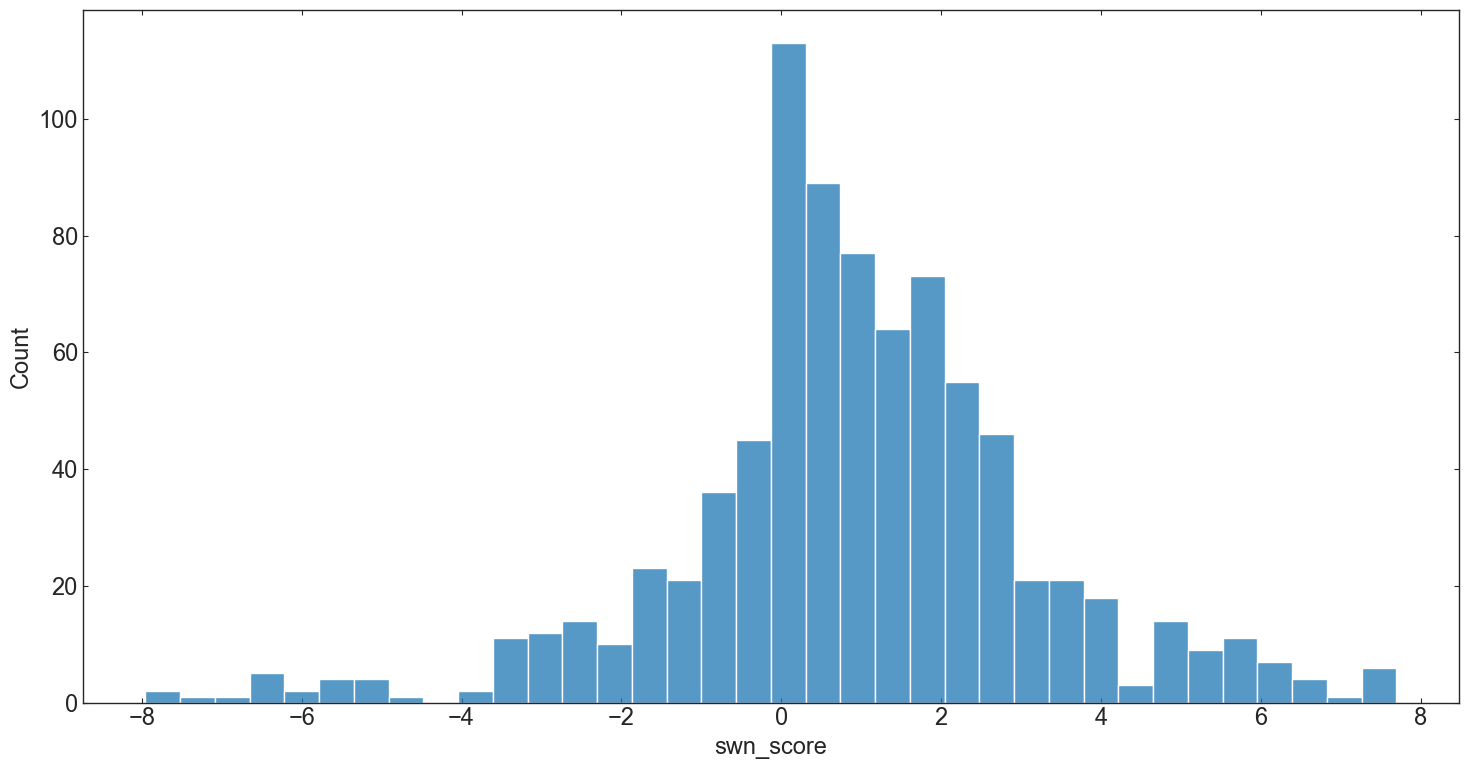

In [6]:
fig , ax = plt.subplots(figsize=(15,8))

sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'hist_swn_score_sentiword.png'));

### generate positive/negative/neutral tags

In [7]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [8]:
reviews['swn_sentiment'].value_counts(dropna=False)

positive    448
negative    355
neutral      96
Name: swn_sentiment, dtype: int64

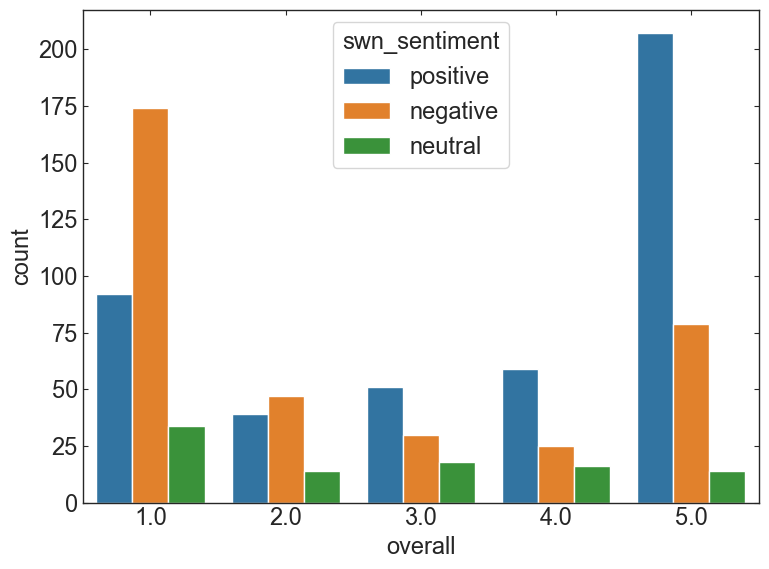

In [9]:
fig, ax = plt.subplots()

sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews, ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'swn_sentiment.png'));

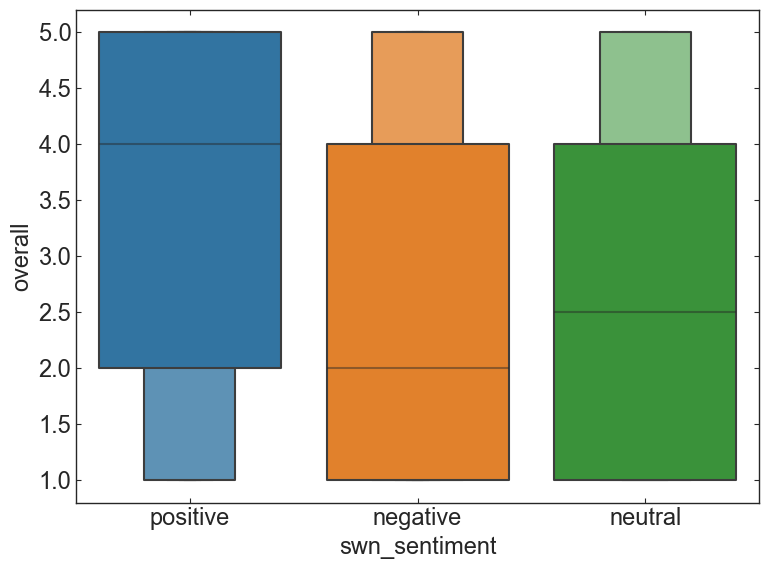

In [10]:
fig, ax = plt.subplots()

sns.boxenplot(x='swn_sentiment', y='overall', data = reviews, ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'box_swn_sentiment.png'));

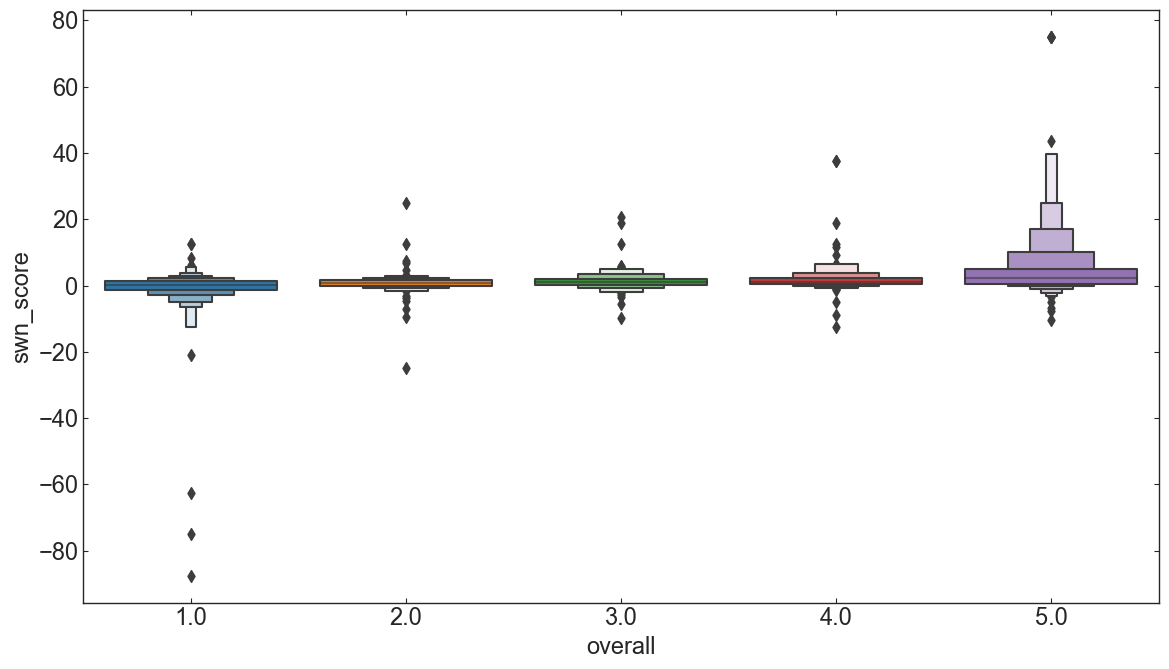

In [11]:
fig, ax = plt.subplots(figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'boxen_swn_sentiment.png'));

In [12]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [13]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [14]:
len(y_swn_pred), len(y_true)

(899, 899)

In [15]:
cm = confusion_matrix(y_true, y_swn_pred)

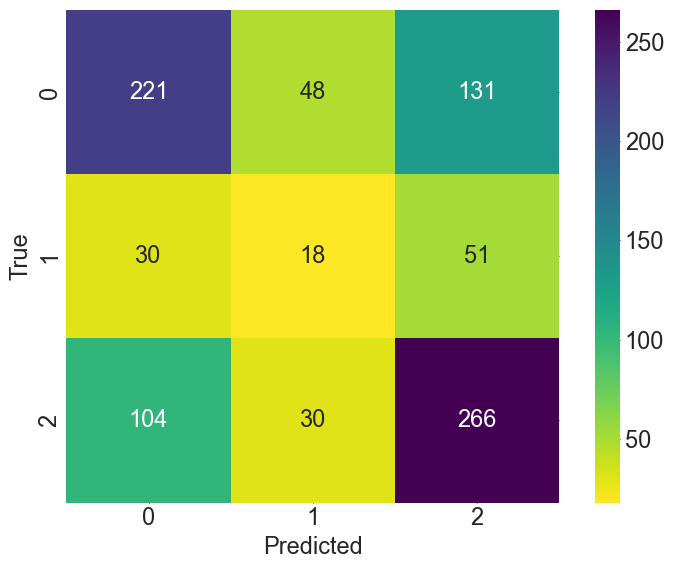

In [16]:
fig , ax = plt.subplots()

sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'heatmap_swn_senti.png'));

### Performance Assessment

In [17]:
print("*"*10 + "  Classification Report  " + "*"*10)
print(classification_report(y_true, y_swn_pred))

**********  Classification Report  **********
              precision    recall  f1-score   support

    negative       0.62      0.55      0.59       400
     neutral       0.19      0.18      0.18        99
    positive       0.59      0.67      0.63       400

    accuracy                           0.56       899
   macro avg       0.47      0.47      0.47       899
weighted avg       0.56      0.56      0.56       899



## Sentiment Scoring Model Using NLTK Opinion Lexicon

In [20]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [21]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [22]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

### restart point w/ sentiment score data

In [23]:
reviews.to_csv(os.path.join(datadir_pr,"small_corpus_swn_oplex.csv"), index=False)

In [24]:
reviews = pd.read_csv(os.path.join(datadir_pr,"small_corpus_swn_oplex.csv"))

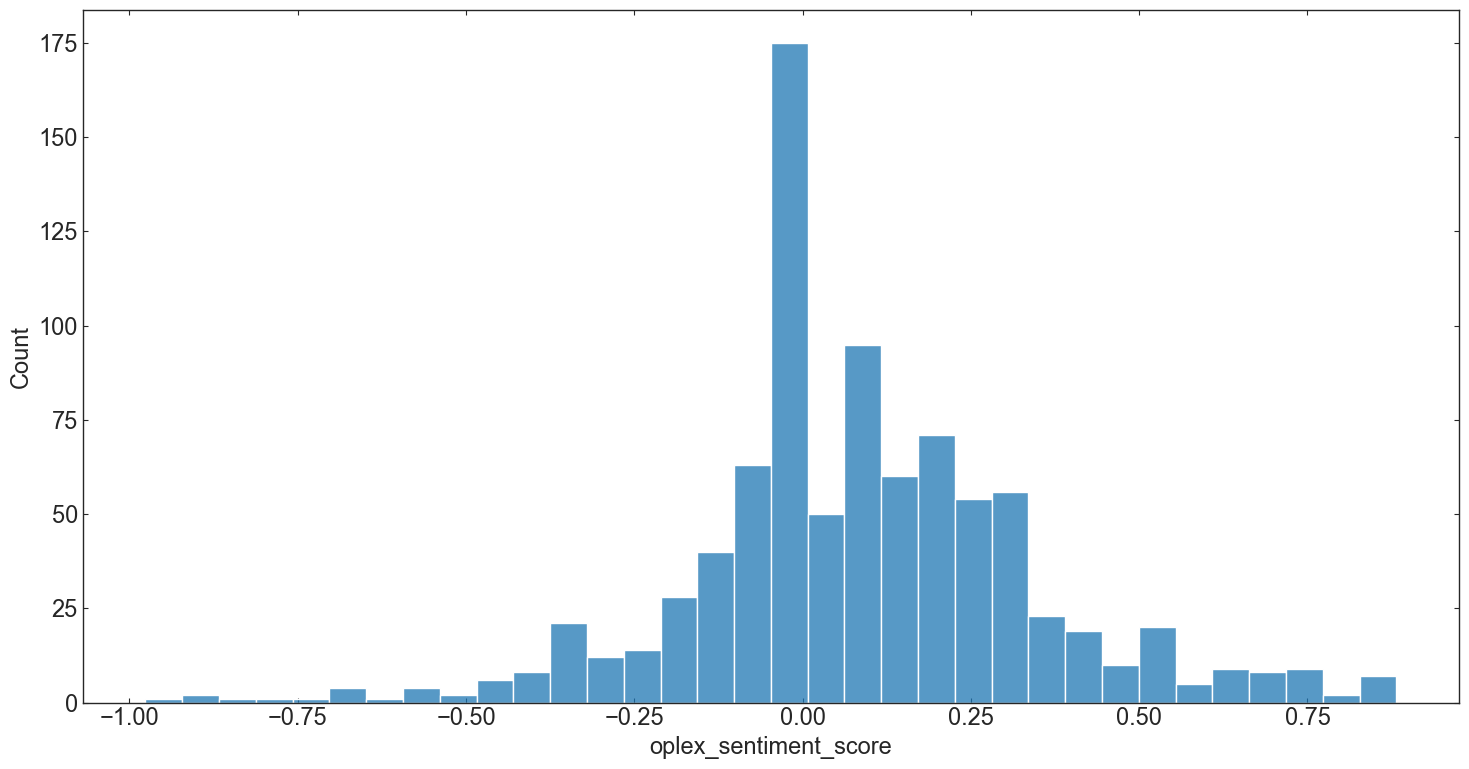

In [25]:
fig , ax = plt.subplots(figsize=(15,8))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'hist_swn_score_oplex_sentiword.png'));

In [26]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [27]:
reviews['oplex_sentiment'].value_counts(dropna=False)

positive    389
neutral     281
negative    229
Name: oplex_sentiment, dtype: int64

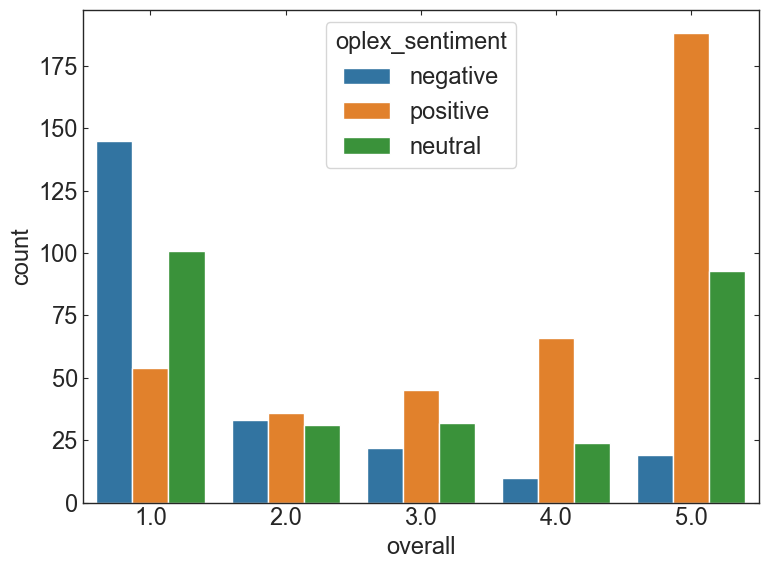

In [28]:
fig, ax = plt.subplots()

sns.countplot(x='overall', hue='oplex_sentiment' ,data=reviews, ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'swn_oplex_sentiment.png'));

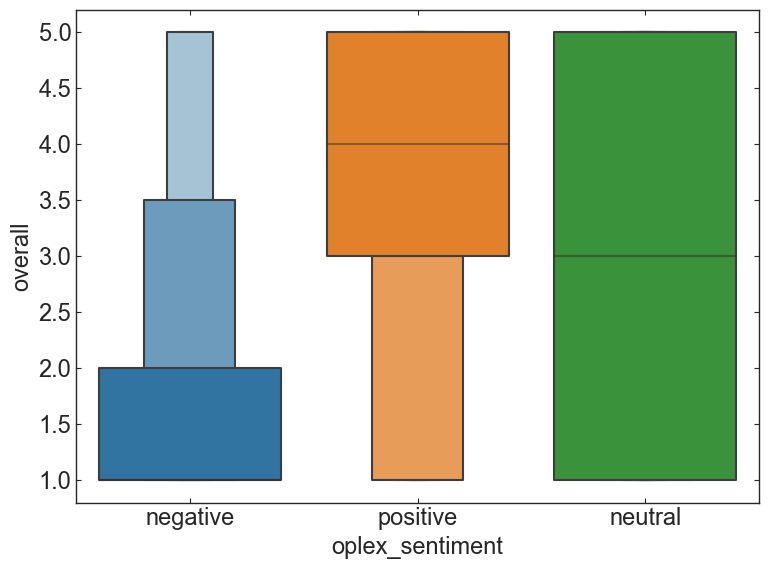

In [29]:
fig, ax = plt.subplots()

sns.boxenplot(x='oplex_sentiment', y='overall', data=reviews, ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'box_swn_oplex_sentiment.png'));

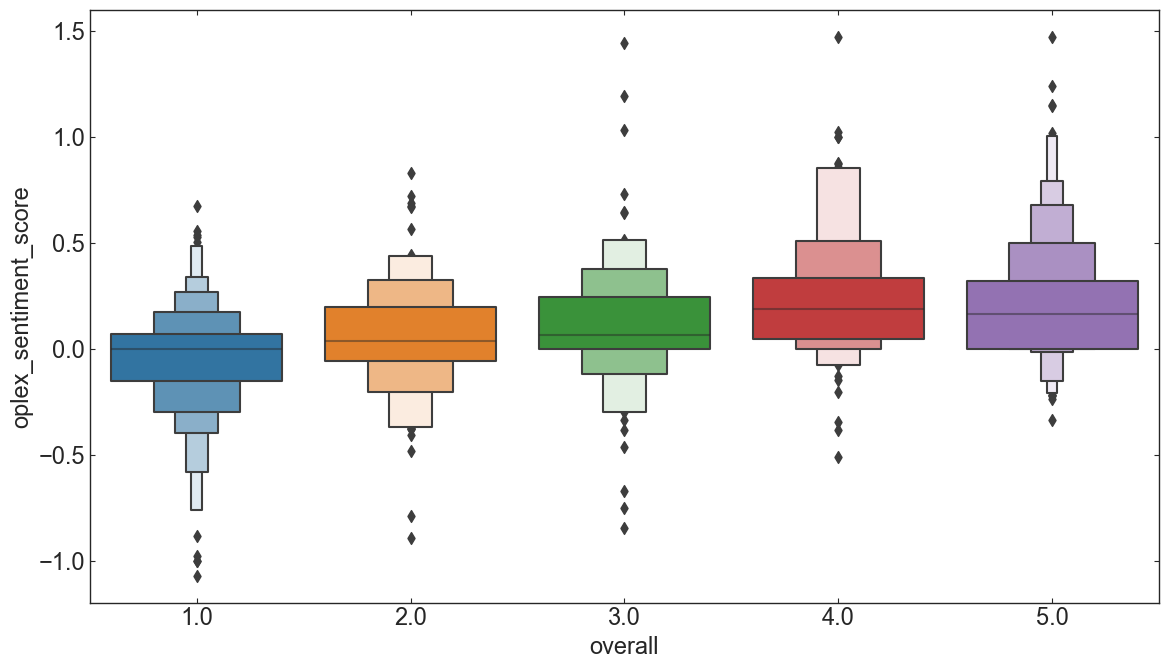

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data=reviews, ax=ax)

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'boxen_swn_oplex_sentiment.png'));

In [31]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [32]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

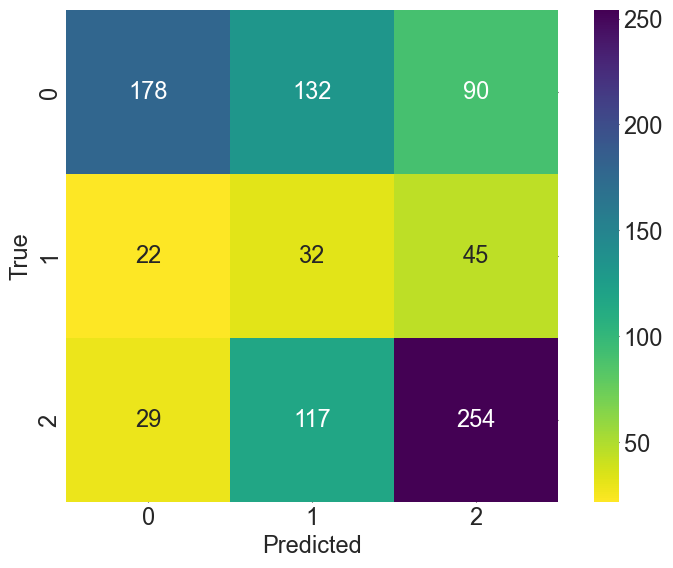

In [33]:
fig , ax = plt.subplots()

sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

fig.tight_layout()
fig.savefig(os.path.join(figdir, 'heatmap_swn_oplex_senti.png'));

In [34]:
oplex_cm = list(oplex_cm.ravel())

In [35]:
oplex_cm

[178, 132, 90, 22, 32, 45, 29, 117, 254]

### Performance Assessment

In [36]:
print("*"*10 + "  Classification Report  " + "*"*10)
print(classification_report(y_true, y_oplex_pred))

**********  Classification Report  **********
              precision    recall  f1-score   support

    negative       0.78      0.45      0.57       400
     neutral       0.11      0.32      0.17        99
    positive       0.65      0.64      0.64       400

    accuracy                           0.52       899
   macro avg       0.51      0.47      0.46       899
weighted avg       0.65      0.52      0.56       899

